# Community Detection - Lab

## Introduction

In this lab, you'll once again work to cluster a network dataset. This time, you'll be investigating a [Meetup](https://www.meetup.com/) dataset for events occurring in Nashville.

## Objectives

You will be able to: 

- Make visualizations of clusters and gain insights about how the clusters have formed 
- Cluster a real-life social network dataset to detect communities within the network  


## Load the Dataset

To get started, load the dataset `'nashville-meetup/group-edges.csv'` as a pandas Dataframe. 

In [12]:
# Import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
# Your code here

groups = pd.read_csv('nashville-meetup/group-edges.csv', index_col=0)

In [9]:
groups

group1    group2  weight
0     19292162    535553       2
1     19292162  19194894       1
2     19292162  19728145       1
3     19292162  18850080       2
4     19292162   1728035       1
...        ...       ...     ...
6687   1576921   1642477       2
6688  18882523  18573279       1
6689  18882523  19654655       1
6690  18573279  19654655       2
6691  23515107    526316       1

[6692 rows x 3 columns]

To add some descriptive data, import the file `'nashville-meetup/meta-groups.csv'`.

In [4]:
# Your code here
groups_meta = pd.read_csv('nashville-meetup/meta-groups.csv')

In [6]:
groups_meta

group_id                                 group_name  num_members  \
0      339011                    Nashville Hiking Meetup        15838   
1    19728145           Stepping Out Social Dance Meetup         1778   
2     6335372                           Nashville soccer         2869   
3    10016242                                     NashJS         1975   
4    21174496  20's & 30's Women looking for girlfriends         2782   
..        ...                                        ...          ...   
597  23742545   Smyrna Yoga Zumba & Boot Camp Women Only          139   
598  20647425                   ML/JP Dance Music Family           97   
599  22504351                     Sumner County Shooters           32   
600  21686664                        Gallatin Makerspace          118   
601  19494897            The Relationship Sounding Board           40   

     category_id         category_name  organizer_id  \
0             23  Outdoors & Adventure       4353803   
1              5               Dancing     118484462   
2             32   Sports & Recreation     108448302   
3             34                  Tech       8111102   
4             31           Socializing     184580248   
..           ...                   ...           ...   
597            9               Fitness     226783032   
598           21                 Music     173945092   
599           32   Sports & Recreation       6141229   
600           34                  Tech     126066112   
601           33               Support     186028004   

                              group_urlname  
0                          nashville-hiking  
1                    steppingoutsocialdance  
2                          Nashville-soccer  
3                                    nashjs  
4                  new-friends-in-Nashville  
..                                      ...  
597  Smyrna-Yoga-Zumba-Boot-Camp-Women-Only  
598                ML-JP-Dance-Music-Family  
599                    SumnerCountyShooters  
600                      GallatinMakerspace  
601         The-Relationship-Sounding-Board  

[602 rows x 7 columns]

## Transform to a Network Representation

Take the Pandas DataFrame and transform it into a graph representation via NetworkX. Make nodes the names of the various groups within the Nashville area. The edges should be the weights between these groups.

In [26]:
# Create a lookup dictionary from groups_meta
group_meta_dict = groups_meta.set_index('group_id')['group_name'].to_dict()
# Define a function to map group IDs to names
def map_group_names(row):
    return pd.Series({
        'group1_name': group_meta_dict.get(row['group1'], None),
        'group2_name': group_meta_dict.get(row['group2'], None)
    })
# Use apply to map group names to each row
groups_with_names = groups.join(groups.apply(map_group_names, axis=1))
groups_with_names

group1    group2  weight  \
0     19292162    535553       2   
1     19292162  19194894       1   
2     19292162  19728145       1   
3     19292162  18850080       2   
4     19292162   1728035       1   
...        ...       ...     ...   
6687   1576921   1642477       2   
6688  18882523  18573279       1   
6689  18882523  19654655       1   
6690  18573279  19654655       2   
6691  23515107    526316       1   

                                            group1_name  \
0                                  Nashville CocoaHeads   
1                                  Nashville CocoaHeads   
2                                  Nashville CocoaHeads   
3                                  Nashville CocoaHeads   
4                                  Nashville CocoaHeads   
...                                                 ...   
6687                               Music City Jazz Fans   
6688    Nashville Electronic Music & Synthesizer Meetup   
6689    Nashville Electronic Music & Synthesizer Meetup   
6690  Advanced Audio + Applications Exchange (A3E) -...   
6691                                          CityWalks   

                                            group2_name  
0                                               Nash.rb  
1     Nashville Christian Technologists and Entrepre...  
2                      Stepping Out Social Dance Meetup  
3                                             NashReact  
4                                   WordPress Nashville  
...                                                 ...  
6687  Movie Lovers:  New, Classic, and Foreign Films...  
6688  Advanced Audio + Applications Exchange (A3E) -...  
6689                        Nashville Music Programmers  
6690                        Nashville Music Programmers  
6691             ¡Diablos Que Bailan! (Salsa Nashville)  

[6692 rows x 5 columns]

In [28]:
# Your code here

G = nx.from_pandas_edgelist(groups_with_names, 'group1_name', 'group2_name', 'weight')

## Visualize the Network

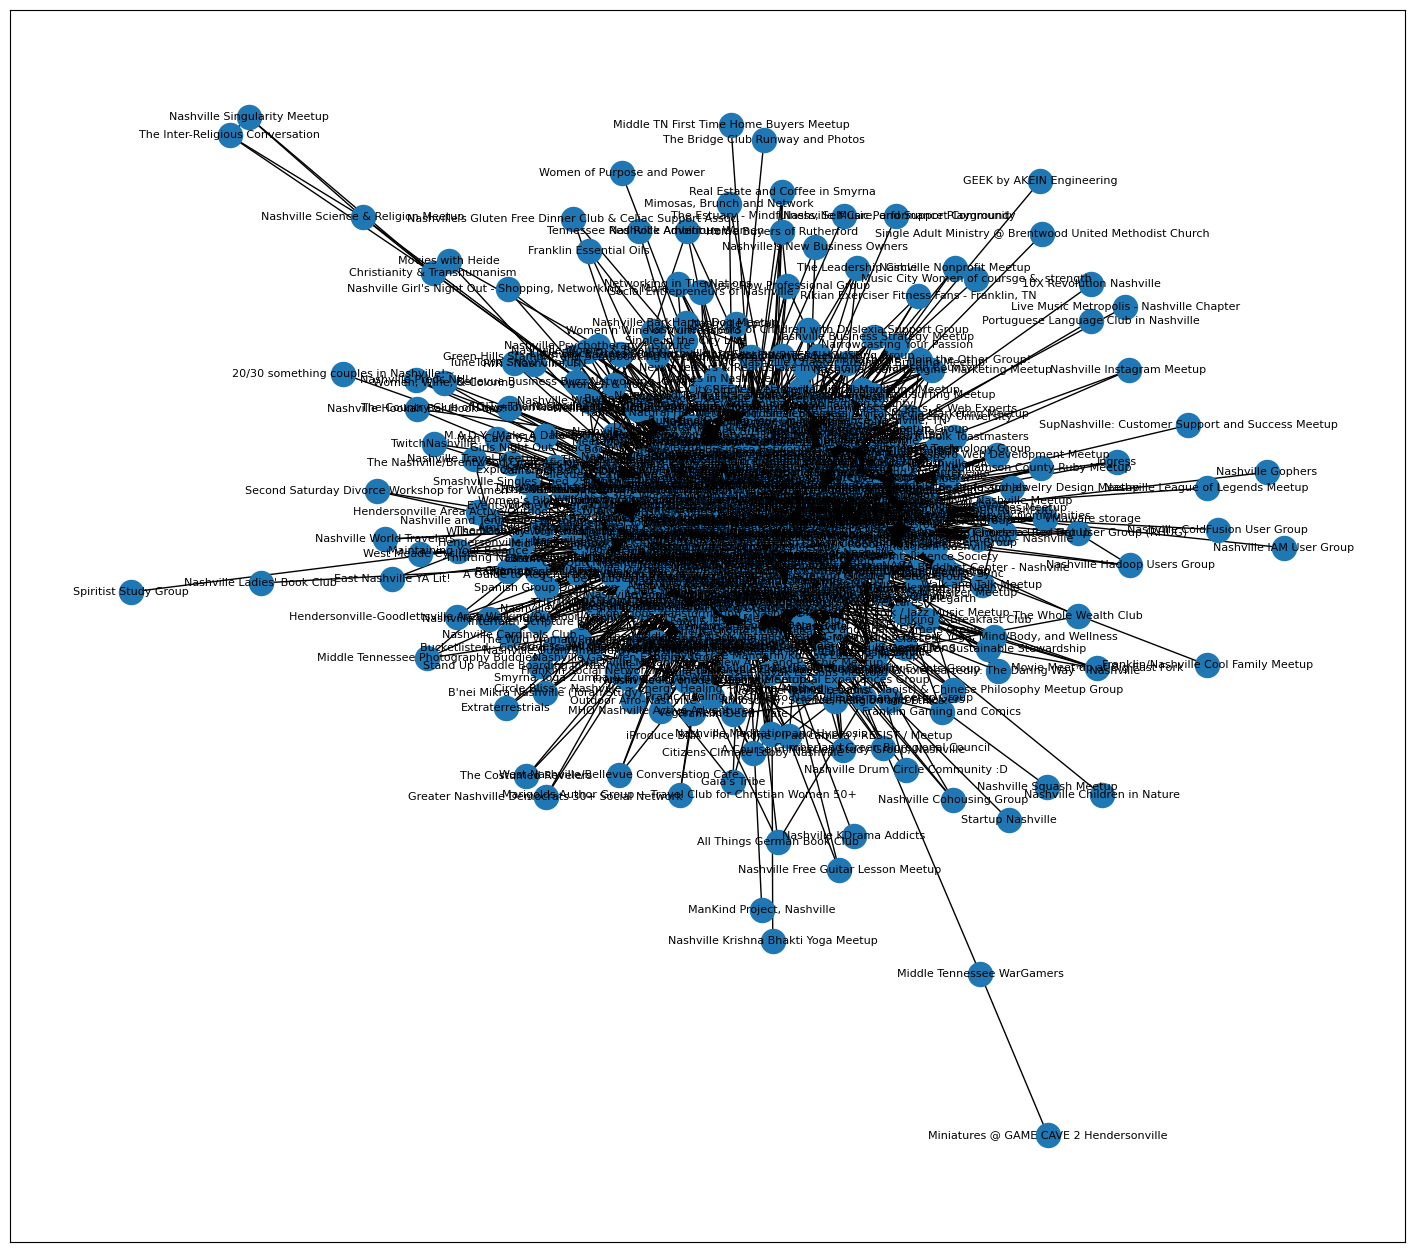

In [30]:
# Your code here
plt.figure(figsize=(18,16))
nx.draw_networkx(G, font_size=8)

## Refine the Visual

As you should see, the initial visualization is a globular mess! Refine the visualization to better picture the center core of the  network.

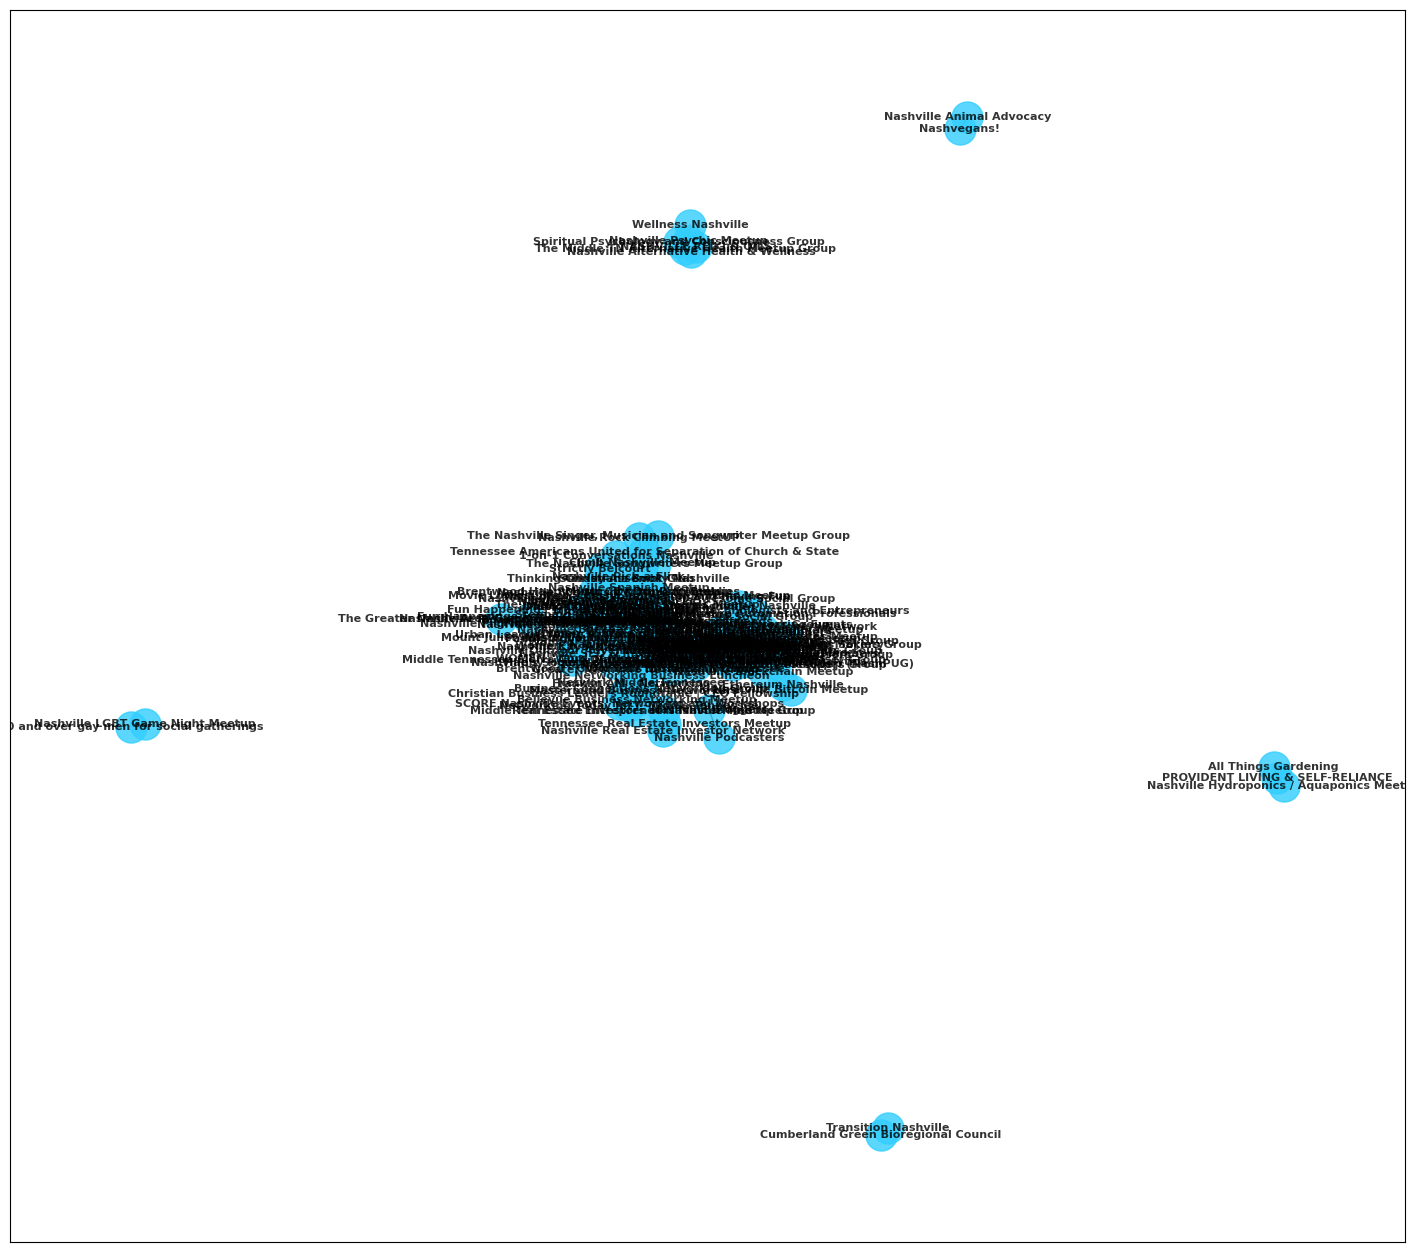

In [36]:
# Your code here
groups_filtered = groups_with_names[groups_with_names['weight'] > 5]

G_filt = nx.from_pandas_edgelist(groups_filtered, 'group1_name', 'group2_name', 'weight')
plt.figure(figsize=(18,16))
nx.draw_networkx(G_filt, pos=nx.spring_layout(G_filt),
        alpha=.8, node_color='#32cefe', node_size=500,
        with_labels=True, font_size=8, font_weight='bold')

## Cluster the Network

Now, that the dataset is a little more manageable, try clustering the remaining group nodes.

In [39]:
# Your code here
gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G_filt))
for n, clusters in enumerate(gn_clusters):
    print('After removing {} edges, there are {} clusters.'.format(n, len(clusters)))

After removing 0 edges, there are 7 clusters.
After removing 1 edges, there are 8 clusters.
After removing 2 edges, there are 9 clusters.
After removing 3 edges, there are 10 clusters.
After removing 4 edges, there are 11 clusters.
After removing 5 edges, there are 12 clusters.
After removing 6 edges, there are 13 clusters.
After removing 7 edges, there are 14 clusters.
After removing 8 edges, there are 15 clusters.
After removing 9 edges, there are 16 clusters.
After removing 10 edges, there are 17 clusters.
After removing 11 edges, there are 18 clusters.
After removing 12 edges, there are 19 clusters.
After removing 13 edges, there are 20 clusters.
After removing 14 edges, there are 21 clusters.
After removing 15 edges, there are 22 clusters.
After removing 16 edges, there are 23 clusters.
After removing 17 edges, there are 24 clusters.
After removing 18 edges, there are 25 clusters.
After removing 19 edges, there are 26 clusters.
After removing 20 edges, there are 27 clusters.
After

## Determine An Optimal Clustering Schema

Finally, determine a final clustering organization.

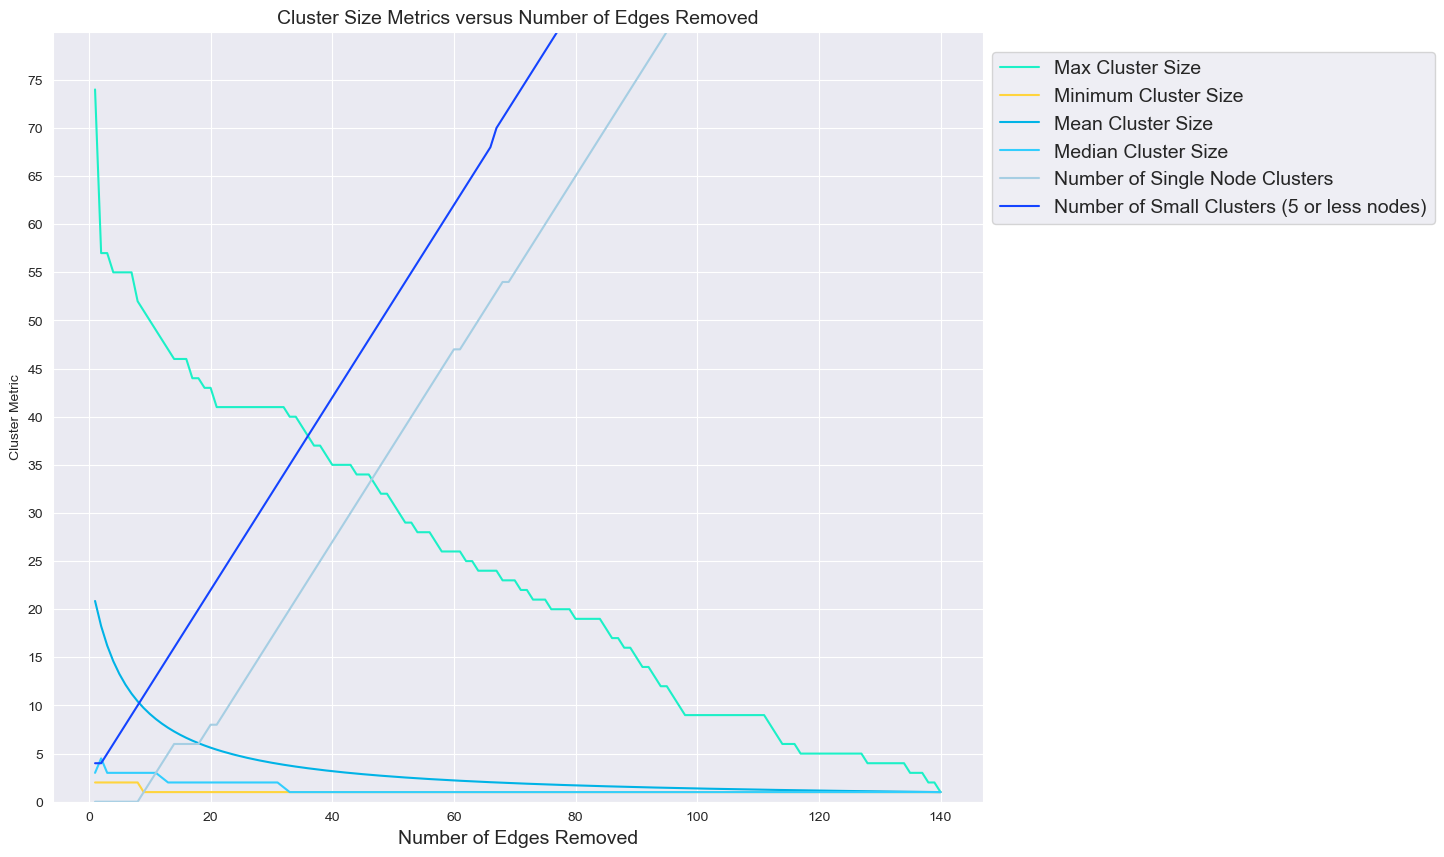

In [40]:
# Your code here
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
          '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
          '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
          '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
          '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
          '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
          '#80cdc1', '#35978f', '#01665e', '#003c30']

fig = plt.figure(figsize=(12,10))

x = [n+1 for n in range(len(gn_clusters))]

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,max_cluster_size, color=colors[0], label='Max Cluster Size')

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,min_cluster_size, color=colors[1], label='Minimum Cluster Size')

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,mean_cluster_size, color=colors[2], label='Mean Cluster Size')

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x,median_cluster_size, color=colors[3], label='Median Cluster Size')

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x,single_node_clusters, color=colors[6], label='Number of Single Node Clusters')

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster ]) for cluster in gn_clusters]
plt.plot(x,small_clusters, color=colors[5], label='Number of Small Clusters (5 or less nodes)')

plt.legend(loc=(1.01,.75), fontsize=14)
plt.title('Cluster Size Metrics versus Number of Edges Removed', fontsize=14)
plt.xlabel('Number of Edges Removed', fontsize=14)
plt.ylabel('Cluster Metric')
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Visualize the Clusters

Analyze the output of your clustering schema. Do any clusters of groups stand out to you?

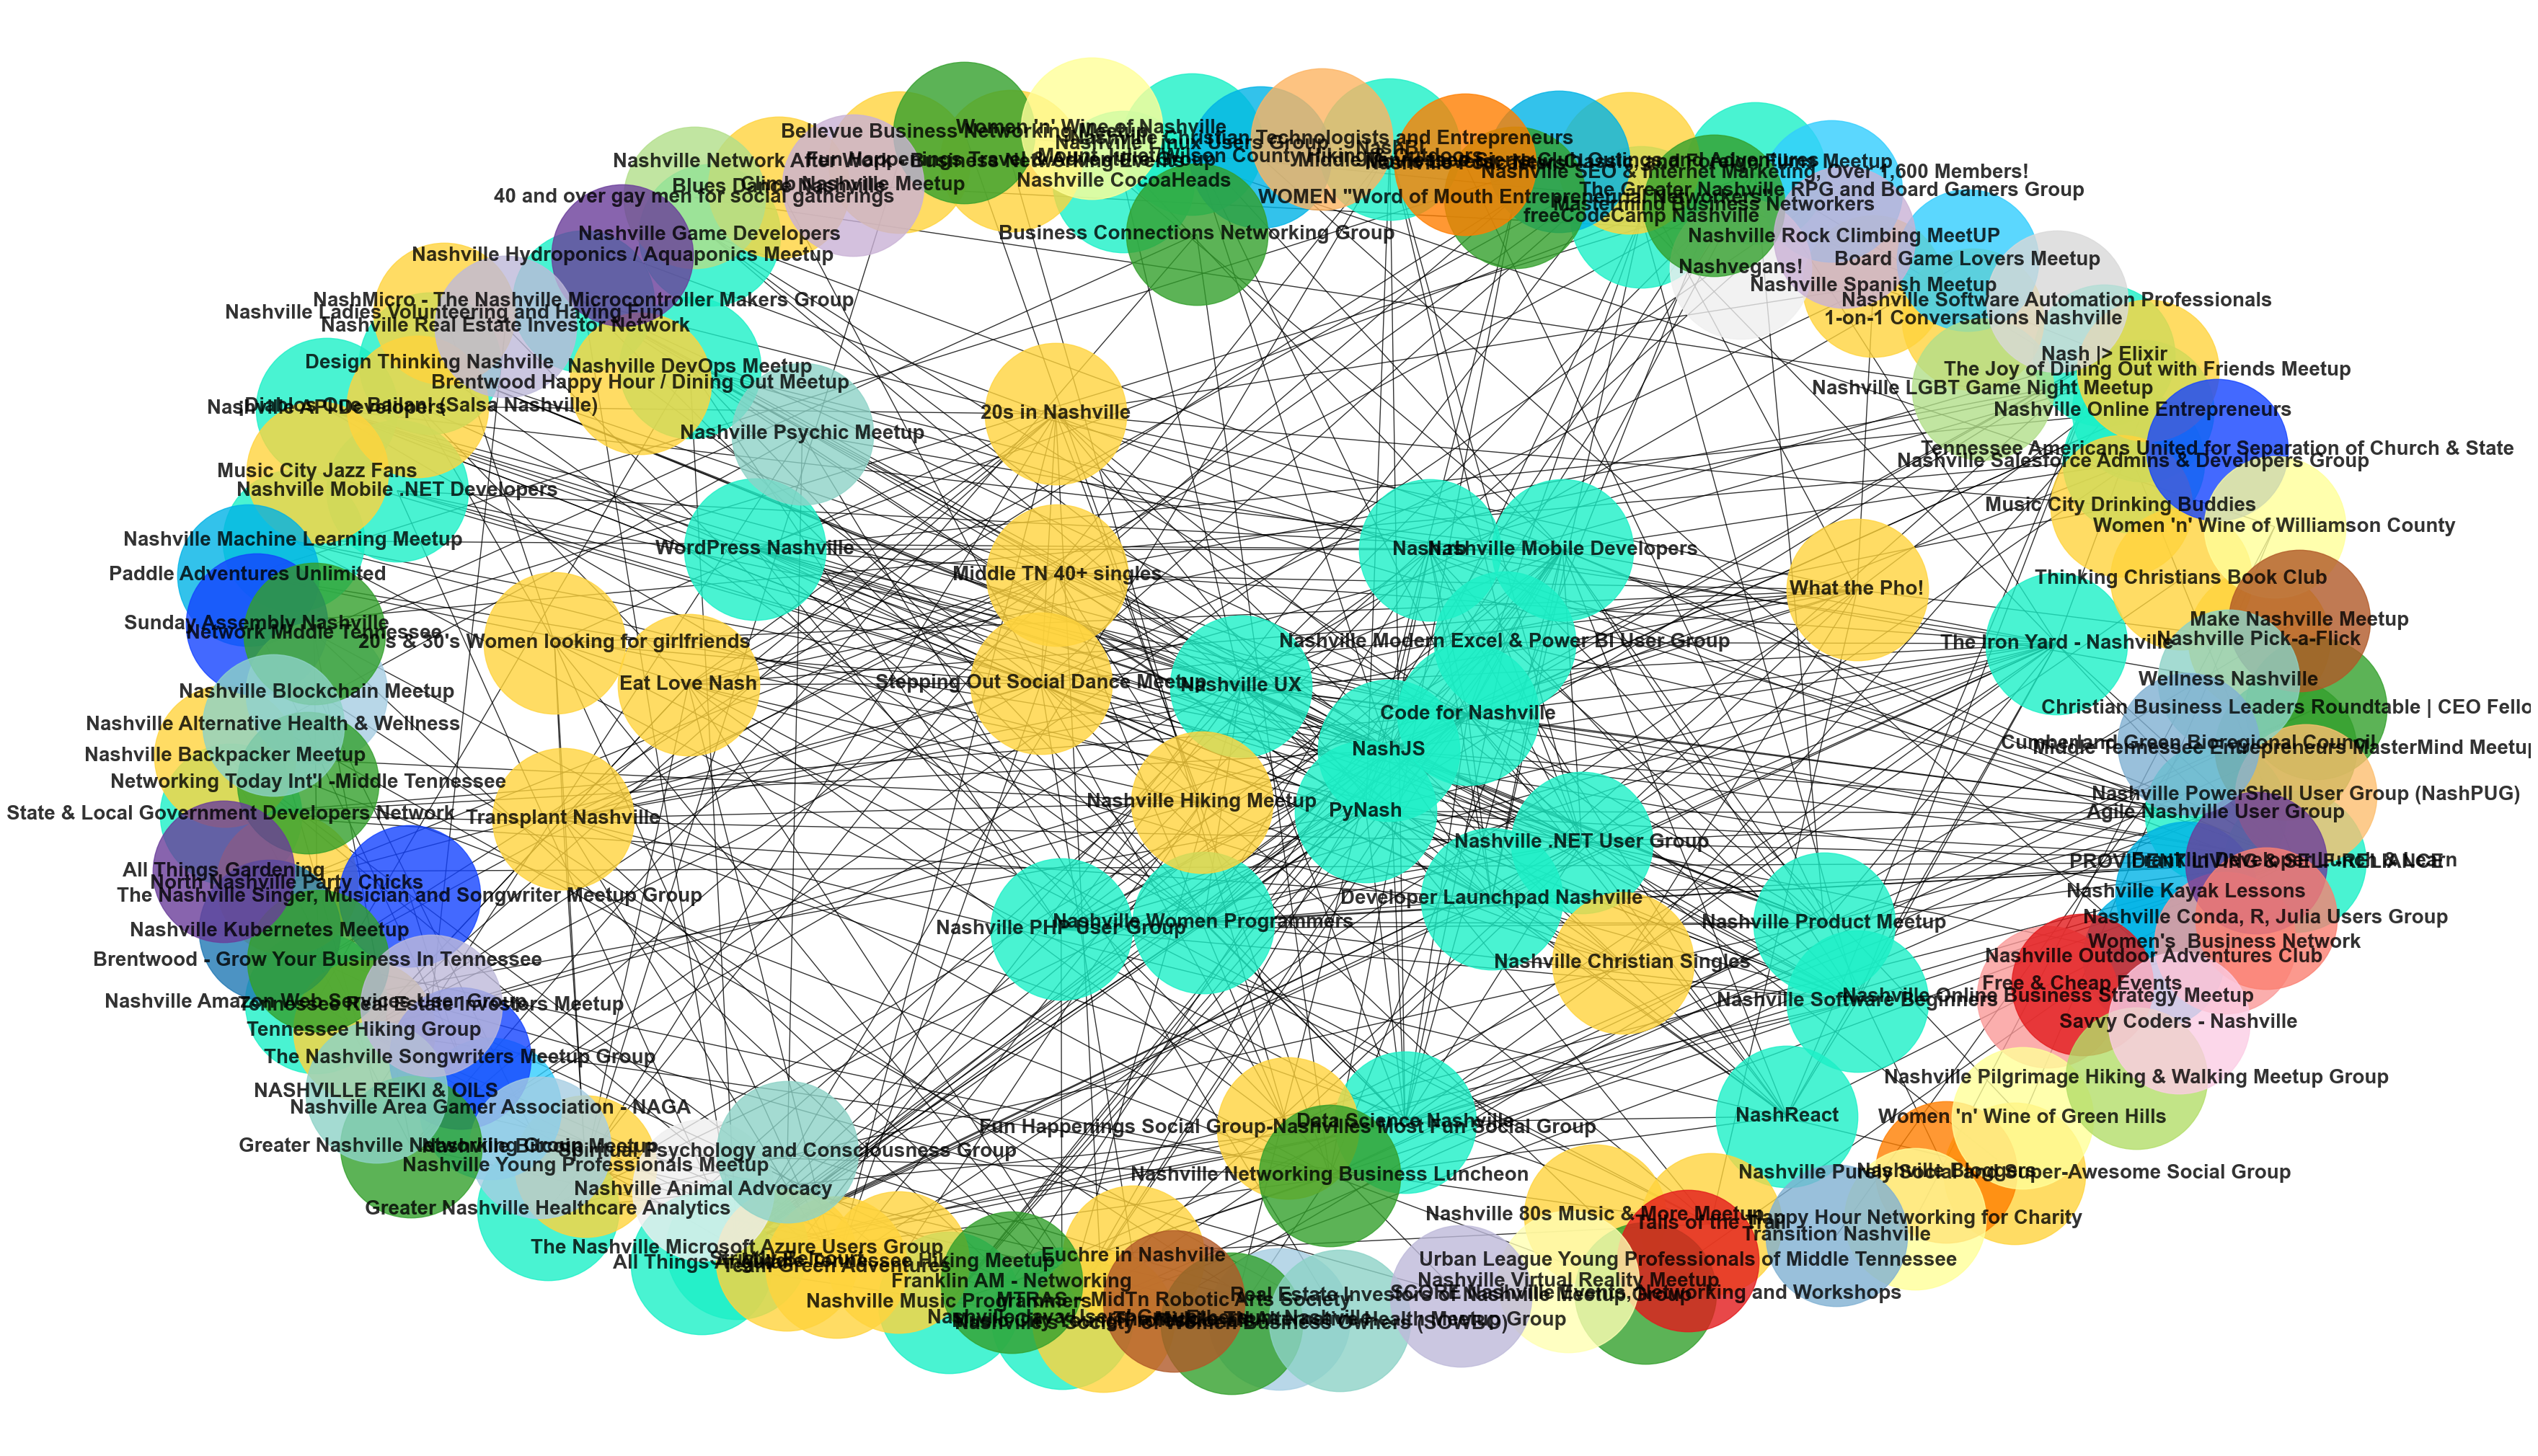

In [43]:
# Your code here
def plot_girvan_newman(G, clusters):
    #Your code here
    fig = plt.figure(figsize=(35,20))
    colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
              '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
              '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
              '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
              '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
              '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
              '#80cdc1', '#35978f', '#01665e', '#003c30']
    for n , c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G, k=3.6, seed=3), with_labels=True, node_color=colors[n],
                alpha=0.8, node_size=20000, font_weight='bold', font_size=20)
    plt.show()
sns.set_style('white')
plot_girvan_newman(G_filt, gn_clusters[20])

## Summary

In this lab, you got another chance to practice your network clustering skills, investigating a meetup dataset of events and groups surrounding the Nashville area. If you're up for the challenge, feel free to continue investigating the dataset and trying to cluster users or events!                                                                                                                                                               